In [39]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append('/home/galina/PythonProjects/common_functions')
import peptides as pep

from matplotlib.patches import Rectangle

% matplotlib inline

# Collect EP data 

In [40]:
columns = ['Grid Index',
           'Peptide',
           'Peptide Length',
           'Peptide Weight',
           'Bad EP',
           
           'Peptide Readout',
           'Peptide Box Mean',
#            'Peptide Box Median'
#            'Peptide Box SD',
            'Peptide Box MAD',
#            'Peptide Box Max',
#            'Peptide Box Min',
           
           'Streptavidin Readout',
           'Streptavidin Box Mean',
#            'Streptavidin Box Median'
#            'Streptavidin Box SD',
            'Streptavidin Box MAD',
#            'Streptavidin Box Max',
#            'Streptavidin Box Min'
           ]

data_ep = pd.read_csv('dIm EP Peptide from target box grid.txt', sep = '\t')
data_ep.rename(columns = {'Index'     : 'Grid Index',
                          'Label'     : 'Peptide',
                          'Mean'      : 'Peptide Box Mean',
                          'Std. Dev.' : 'Peptide Box SD',
                          'Median'    : 'Peptide Box Median',
                          'MAD'       : 'Peptide Box MAD',
                          'Max.'      : 'Peptide Box Max',
                          'Min.'      : 'Peptide Box Min'},
               inplace = True)

tmp = pd.read_csv('dIm EP Streptavidin from target box grid.txt', sep = '\t')
data_ep['Streptavidin Box Mean']   = tmp['Mean']
data_ep['Streptavidin Box Median'] = tmp['Median']
data_ep['Streptavidin Box SD']     = tmp['Std. Dev.']
data_ep['Streptavidin Box MAD']    = tmp['MAD']
data_ep['Streptavidin Box Max']    = tmp['Max.']
data_ep['Streptavidin Box Min']    = tmp['Min.']

tmp = [float(x) for x in np.genfromtxt('dIm EP Peptide from target grid.txt', delimiter="\n")][2:]
data_ep['Peptide Readout'] = tmp

tmp = [float(x) for x in np.genfromtxt('dIm EP Streptavidin from target grid.txt', delimiter="\n")][2:]
data_ep['Streptavidin Readout'] = tmp

bad_indices = [int(x) for x in np.genfromtxt("bad spots.txt", delimiter="\n")]
binary_bad = [False] * len(data_ep)
for i in bad_indices:
    binary_bad[i] = True
data_ep['Bad EP'] = binary_bad

data_ep = data_ep[data_ep['Peptide'].notnull()]
data_ep = data_ep[data_ep['Peptide'] != 'X']

data_ep['Peptide Length'] = data_ep['Peptide'].apply(len)
data_ep['Peptide Weight'] = data_ep['Peptide'].apply(pep.weight)

data_ep = data_ep[columns]
data_ep.head()

,Grid Index,Peptide,Peptide Length,Peptide Weight,Bad EP,Peptide Readout,Peptide Box Mean,Peptide Box MAD,Streptavidin Readout,Streptavidin Box Mean,Streptavidin Box MAD
0,0,WTHPQFAT,8,1113.188,False,0.000594,0.000874,0.000162,0.001177,0.001173,0.000096
1,1,WTHPQFAT,8,1113.188,False,0.000394,0.000573,0.000204,0.001248,0.001172,0.000077
2,2,WTHLQFAT,8,1129.231,False,0.000287,0.000280,0.000074,-0.000012,0.000010,0.000058
3,3,NGQFQVWIPLAQK,13,1744.957,False,0.001913,0.001763,0.000186,-0.000134,-0.000035,0.000073
4,4,LQLHPQAGK,9,1135.280,False,0.003017,0.002804,0.000151,0.000319,0.000399,0.000060


# Collect RT data

In [41]:
columns = ['Grid Index',
#           'Peptide',
           'Bad RT',
           'Streptavidin Dissociation',
           'Streptavidin Association SNR',
           'Streptavidin Noise']

data_rt = pd.read_csv('dR RT Streptavidin Endpoint Signals Scrubbed.txt', header = 0, sep = '\t')
data_rt.reset_index(level = 0, inplace = True)
data_rt.rename(columns = {'index'          :  'Grid Index',
                          'Label'          : 'Peptide',
                          'Dissoc. Mean'   : 'Streptavidin Dissociation',
                          'Assoc. SNR'     : 'Streptavidin Association SNR',
                          'Baseline Noise' : 'Streptavidin Noise'}, inplace = True)

data_rt['Bad RT'] = data_rt['Probe'].isnull()
data_rt = data_rt[columns]
# data_rt['Peptide'] = data_rt['Peptide'].fillna('NA')
data_rt.head()

,Grid Index,Bad RT,Streptavidin Dissociation,Streptavidin Association SNR,Streptavidin Noise
0,0,False,0.001104,7.134546,0.000211
1,1,False,0.000765,3.429684,0.000263
2,2,False,0.000072,-0.280433,0.000237
3,3,False,-0.000145,-0.504192,0.000237
4,4,False,0.000319,2.693665,0.000237


# Merge and filter

In [42]:
data = pd.merge(data_ep, data_rt, on = ['Grid Index'], how = 'inner')

bad = (data['Bad EP']) | (data['Bad RT'])

data = data[~bad]
data.drop(['Bad EP', 'Bad RT'], axis = 1, inplace = True)

data.head()

,Grid Index,Peptide,Peptide Length,Peptide Weight,Peptide Readout,Peptide Box Mean,Peptide Box MAD,Streptavidin Readout,Streptavidin Box Mean,Streptavidin Box MAD,Streptavidin Dissociation,Streptavidin Association SNR,Streptavidin Noise
0,0,WTHPQFAT,8,1113.188,0.000594,0.000874,0.000162,0.001177,0.001173,0.000096,0.001104,7.134546,0.000211
1,1,WTHPQFAT,8,1113.188,0.000394,0.000573,0.000204,0.001248,0.001172,0.000077,0.000765,3.429684,0.000263
2,2,WTHLQFAT,8,1129.231,0.000287,0.000280,0.000074,-0.000012,0.000010,0.000058,0.000072,-0.280433,0.000237
3,3,NGQFQVWIPLAQK,13,1744.957,0.001913,0.001763,0.000186,-0.000134,-0.000035,0.000073,-0.000145,-0.504192,0.000237
4,4,LQLHPQAGK,9,1135.280,0.003017,0.002804,0.000151,0.000319,0.000399,0.000060,0.000319,2.693665,0.000237


# Streptavidin dIm EP vs dR RT

(-1, 2)

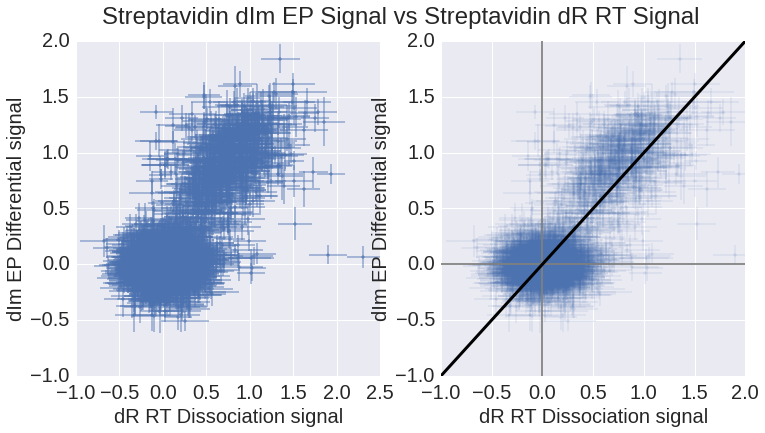

In [43]:
plt.figure(figsize = (12, 6))
plt.suptitle('Streptavidin dIm EP Signal vs Streptavidin dR RT Signal', fontsize = 24)

plt.subplot(1,2,1)
plt.errorbar(x = data['Streptavidin Dissociation'] * 1000,
             y = data['Streptavidin Readout'] * 1000,
             xerr = data['Streptavidin Noise'] * 1000,
             yerr = data['Streptavidin Box MAD'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dR RT Dissociation signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Streptavidin Dissociation'] * 1000,
             y = data['Streptavidin Readout'] * 1000,
             xerr = data['Streptavidin Noise'] * 1000,
             yerr = data['Streptavidin Box MAD'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.1)
plt.xlabel('dR RT Dissociation signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-1, 2))
plt.ylim((-1, 2))

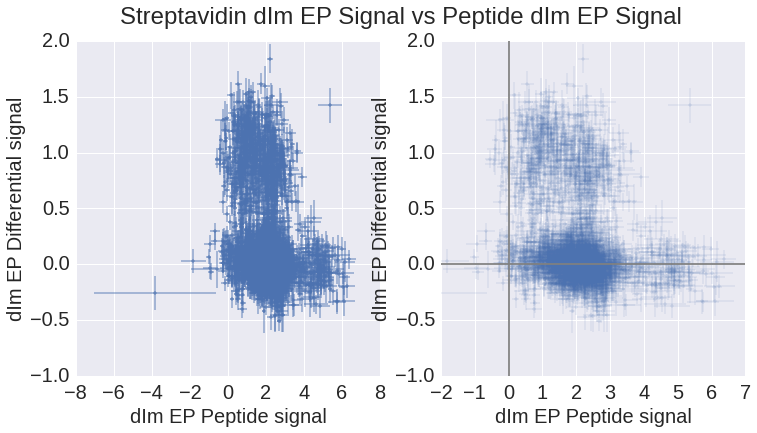

In [45]:
plt.figure(figsize = (12, 6))
plt.suptitle('Streptavidin dIm EP Signal vs Peptide dIm EP Signal', fontsize = 24)

plt.subplot(1,2,1)
plt.errorbar(x = data['Peptide Readout'] * 1000,
             y = data['Streptavidin Readout'] * 1000,
             xerr = data['Peptide Box MAD'] * 1000,
             yerr = data['Streptavidin Box MAD'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Peptide Readout'] * 1000,
             y = data['Streptavidin Readout'] * 1000,
             xerr = data['Peptide Box MAD'] * 1000,
             yerr = data['Streptavidin Box MAD'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.1)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.xlim((-2, 7))
plt.ylim((-1, 2))
plt.show()

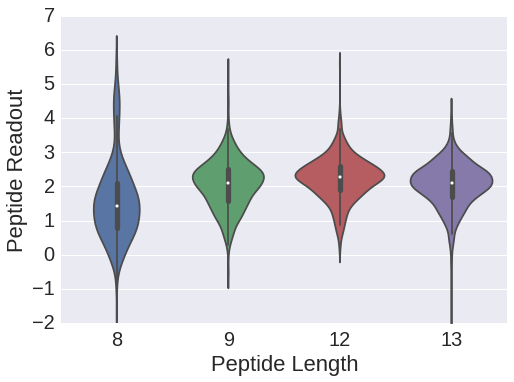

In [46]:
sns.set_context('notebook')
sns.set(font_scale = 2)

mask = (data_ep['Peptide Length'].isin([8, 9, 12, 13])) & (~data_ep['Bad EP'])
sns.violinplot(x = data_ep['Peptide Length'][mask],
               y = data_ep['Peptide Readout'][mask] * 1000,
               order = [8, 9, 12, 13])
plt.ylim((-2, 7))
plt.show()

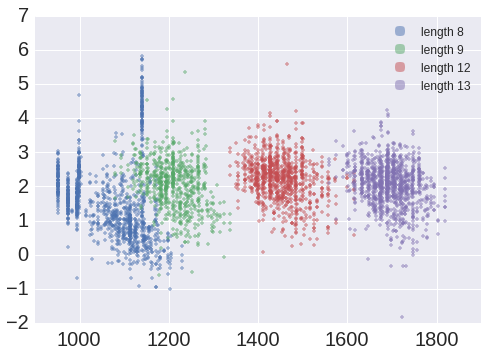

In [48]:
for length in [8, 9, 12, 13]:
    mask = (data_ep['Peptide Length'] == length) & (~data_ep['Bad EP'])
    plt.plot(data_ep[mask]['Peptide Weight'],
             data_ep[mask]['Peptide Readout'] * 1000,
             marker = '.',
             linestyle = 'none',
             alpha = 0.5,
             label = 'length ' + str(length))
plt.ylim((-2, 7))
plt.legend(markerscale = 3, fontsize = 12)
plt.show()

# Aggregate by peptide
# Use only scrubbed 8- and 9-peptide curves

In [49]:
data_ep = pd.read_csv('07 EP dIm Signals.csv')
data_ep = data_ep[['Peptide',
                   'Peptide Signal Mean', 'Peptide Signal SE',
                   'Streptavidin Signal Mean', 'Streptavidin Signal SE']]

data_ep['Peptide Length'] = data_ep['Peptide'].apply(len)
data_ep['Peptide Weight'] = data_ep['Peptide'].apply(pep.weight)

data_ep.head()

,Peptide,Peptide Signal Mean,Peptide Signal SE,Streptavidin Signal Mean,Streptavidin Signal SE,Peptide Length,Peptide Weight
0,AISPPPK,0.002833,0.000051,-0.000018,0.000005,7,816.947
1,THPQFAT,0.001647,0.000148,0.000742,0.000058,7,908.960
2,WHPQFAT,0.000924,0.000067,0.000610,0.000025,7,994.068
3,WTHPFAT,0.001179,0.000101,-0.000002,0.000029,7,967.042
4,WTHPQAT,0.001800,0.000240,0.000214,0.000026,7,947.996


In [50]:
data_rt = pd.read_csv('06 Aggregated dR RT Streptavidin length 8 and 9.csv')
data_rt = data_rt[['Peptide', 'Dissoc Signal Mean', 'Dissoc Signal SE']]
data_rt.rename(columns = {'Dissoc Signal Mean' : 'Streptavidin Dissociation',
                          'Dissoc Signal SE'   : 'Streptavidin Dissociation SE'}, inplace = True)
data_rt['Streptavidin Dissociation SE'] = data_rt['Streptavidin Dissociation SE'].fillna(0)
data_rt.head()

,Peptide,Streptavidin Dissociation,Streptavidin Dissociation SE
0,ATHPQFAT,0.000713,0.000080
1,CTHPQFAT,0.000734,0.000067
2,DTHPQFAT,0.000952,0.000038
3,ETHPQFAT,0.000853,0.000351
4,FTHPQFAT,0.000893,0.000125


# Merge on peptide name

In [51]:
data = pd.merge(data_ep, data_rt, on = 'Peptide', how = 'inner')
data.head()

,Peptide,Peptide Signal Mean,Peptide Signal SE,Streptavidin Signal Mean,Streptavidin Signal SE,Peptide Length,Peptide Weight,Streptavidin Dissociation,Streptavidin Dissociation SE
0,ATHPQFAT,0.001607,0.000181,0.000988,0.000068,8,998.054,0.000713,0.000080
1,CTHPQFAT,0.001241,0.000198,0.000901,0.000094,8,1030.114,0.000734,0.000067
2,DTHPQFAT,0.001857,0.000104,0.000950,0.000030,8,1042.064,0.000952,0.000038
3,ETHPQFAT,0.001977,0.000083,0.000887,0.000043,8,1056.091,0.000853,0.000351
4,FTHPQFAT,0.001455,0.000138,0.001132,0.000036,8,1074.152,0.000893,0.000125


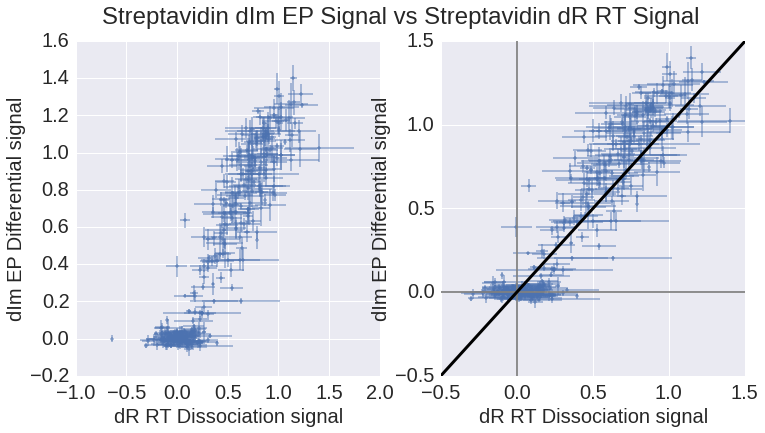

In [52]:
plt.figure(figsize = (12, 6))
plt.suptitle('Streptavidin dIm EP Signal vs Streptavidin dR RT Signal', fontsize = 24)

plt.subplot(1,2,1)
plt.errorbar(x = data['Streptavidin Dissociation'] * 1000,
             y = data['Streptavidin Signal Mean'] * 1000,
             xerr = data['Streptavidin Dissociation SE'] * 1000,
             yerr = data['Streptavidin Signal SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dR RT Dissociation signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Streptavidin Dissociation'] * 1000,
             y = data['Streptavidin Signal Mean'] * 1000,
             xerr = data['Streptavidin Dissociation SE'] * 1000,
             yerr = data['Streptavidin Signal SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dR RT Dissociation signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-0.5, 1.5))
plt.ylim((-0.5, 1.5))
plt.show()

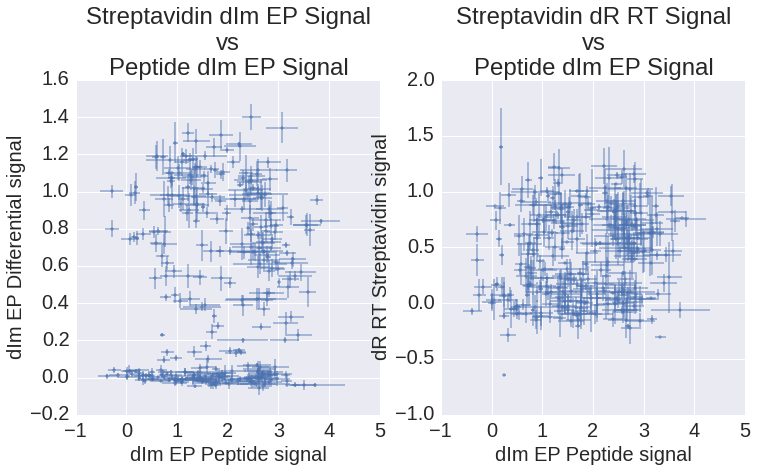

In [54]:
plt.figure(figsize = (12, 6))


plt.subplot(1,2,1)
plt.errorbar(x = data['Peptide Signal Mean'] * 1000,
             y = data['Streptavidin Signal Mean'] * 1000,
             xerr = data['Peptide Signal SE'] * 1000,
             yerr = data['Streptavidin Signal SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.title('Streptavidin dIm EP Signal\nvs\nPeptide dIm EP Signal', fontsize = 24)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Peptide Signal Mean'] * 1000,
             y = data['Streptavidin Dissociation'] * 1000,
             xerr = data['Peptide Signal SE'] * 1000,
             yerr = data['Streptavidin Dissociation SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.title('Streptavidin dR RT Signal\nvs\nPeptide dIm EP Signal', fontsize = 24)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
plt.ylabel('dR RT Streptavidin signal', fontsize = 20)
plt.show()

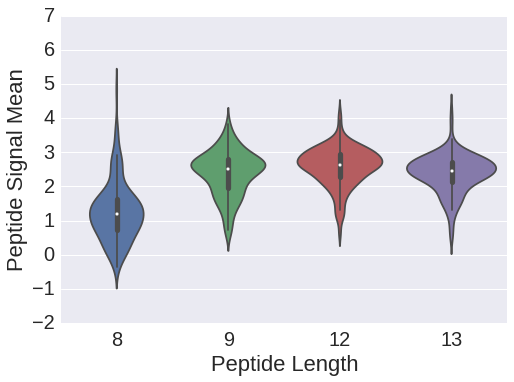

In [55]:
mask = data_ep['Peptide Length'].isin([8, 9, 12, 13])
sns.violinplot(x = data_ep['Peptide Length'][mask],
               y = data_ep['Peptide Signal Mean'][mask] * 1000,
               order = [8, 9, 12, 13])
plt.ylim((-2, 7))
plt.show()

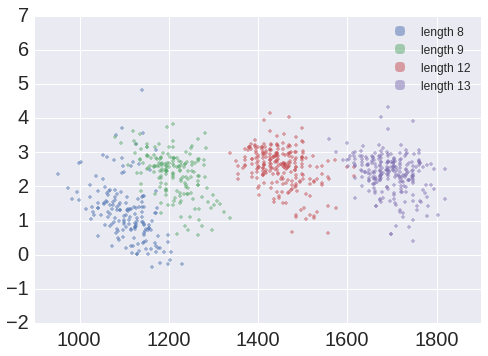

In [57]:
for length in [8, 9, 12, 13]:
    mask = (data_ep['Peptide Length'] == length)
    plt.plot(data_ep[mask]['Peptide Weight'],
             data_ep[mask]['Peptide Signal Mean'] * 1000,
             marker = '.',
             linestyle = 'none',
             alpha = 0.5,
             label = 'length ' + str(length))
plt.ylim((-2, 7))
plt.legend(markerscale = 3, fontsize = 12)
plt.show()